## 第一步：处理数据

### 1.1 导入测试数据

In [10]:
import pandas as pd
import numpy as np
import missingno  # 统计确实数据的

PATH = './train/'
base_info = pd.read_csv(PATH + 'base_info.csv')
print(base_info.shape, base_info['id'].nunique())# base_info的规格，数量
base_info.head(1) # base_info 第一行数据

(24865, 33) 24865


,id,oplocdistrict,industryphy,industryco,dom,opscope,enttype,enttypeitem,opfrom,opto,...,enttypeminu,midpreindcode,protype,oploc,regcap,reccap,forreccap,forregcap,congro,enttypegb
0,47645761dc56bb8c5fae00114b768b5d9b6e917c3aec07c4,340223,M,7513.0,31487d8f256f16bd6244b7251be2ebb24d1db51663c654...,纳米新材料、机械设备、五金配件加工、销售及技术推广服务，道路货物运输。（依法须经批准的项目，...,1100,1150.0,2019-07-11 00:00:00,NaN,...,1151.0,NaN,NaN,2367b4cac96d8598,50.0,NaN,NaN,NaN,NaN,1151


Base_info确实数据统计

<AxesSubplot:>

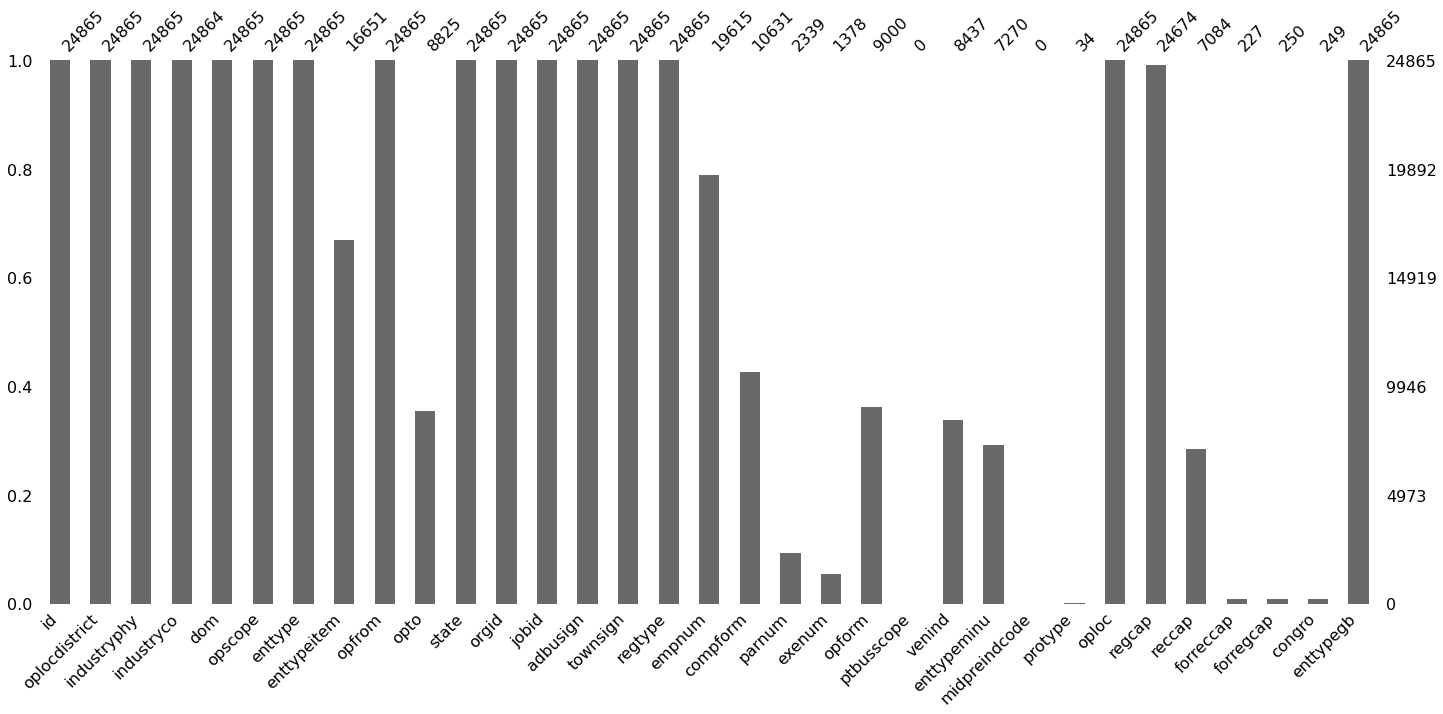

In [11]:
missingno.bar(base_info)

In [15]:
# 带标注的企业数据
entprise_info = pd.read_csv(PATH + 'entprise_info.csv')
entprise_info.shape

(14865, 2)

**验证集，未带标注的企业数据，这是最后需要提交的最终结果的数据集**

In [17]:
entprise_evaluate = pd.read_csv('entprise_evaluate.csv')
entprise_info.shape

(14865, 2)

### 去除空值

base_info行数=24865, base_info 90%个数=2486.5, 10%工人数
(24865, 25)


<AxesSubplot:>

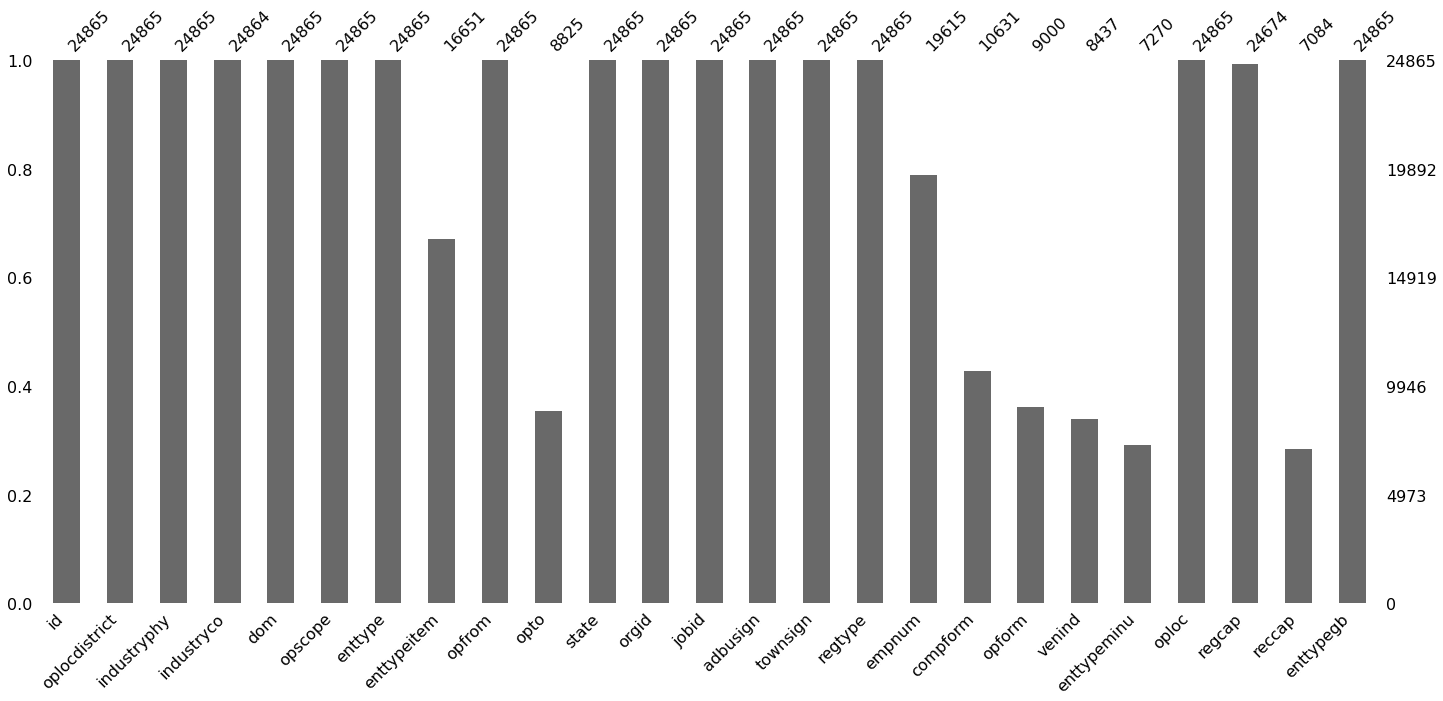

In [28]:
base_info_num = base_info.shape[0] # base_info行数
base_info_drop_ratio = 0.10
print('base_info行数={0}, base_info 90%个数={1}, 10%工人数'.format(base_info_num,base_info_num * base_info_drop_ratio))
# 如果缺失值达到了90%，就直接删除
base_info = base_info.dropna(axis = 1, thresh = base_info_num * base_info_drop_ratio) # 
# 再次总计缺失值
print(base_info.shape)
missingno.bar(base_info)

**再删去一些暂时不想要的数值**

(24865, 24)


<AxesSubplot:>

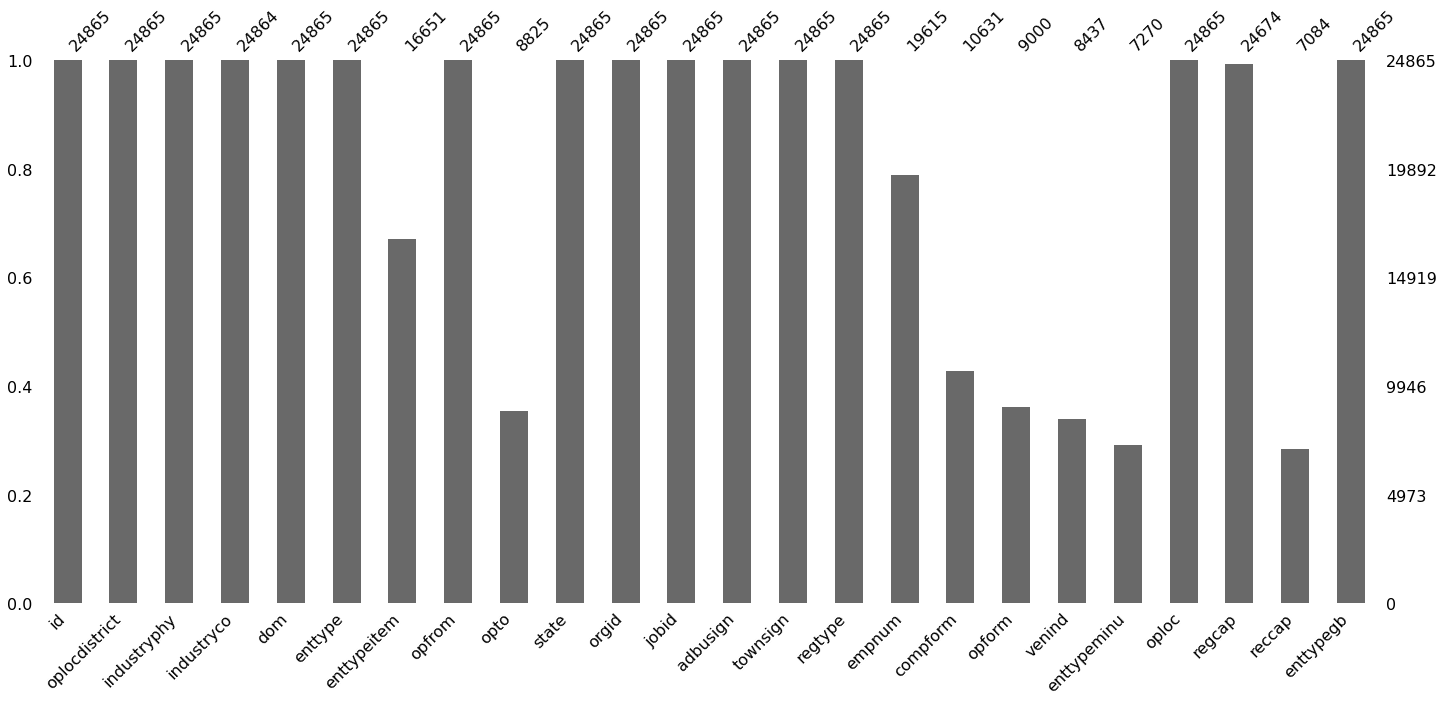

In [30]:
delete_col = [
    'opscope',
]
base_info = base_info.drop(delete_col, axis = 1 )
print(base_info.shape)
missingno.bar(base_info)

**处理日期信息**
将日期转化为天数

(24865, 24)


<AxesSubplot:>

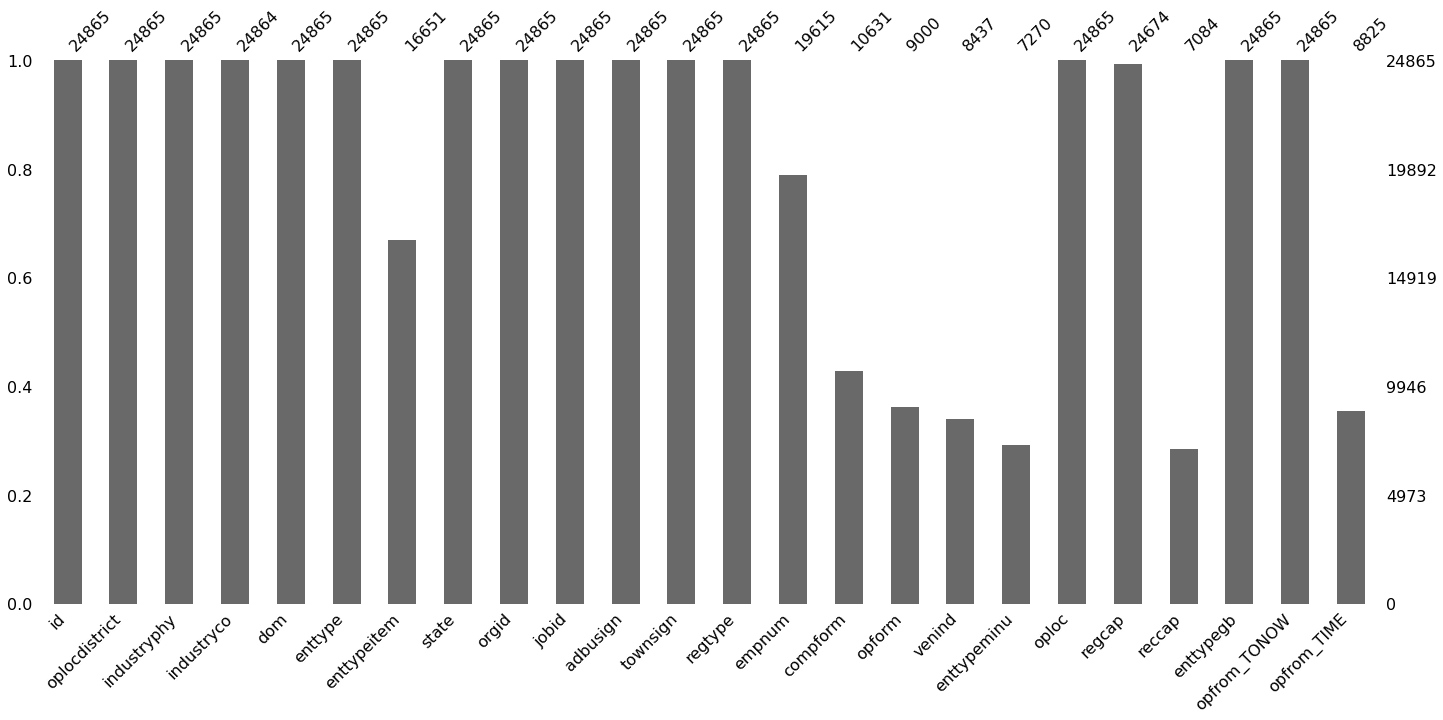

In [35]:
from datetime import datetime
base_info['opfrom'] = pd.to_datetime(base_info['opfrom'])
base_info['opto'] = pd.to_datetime(base_info['opto'])
base_info['opfrom_TONOW'] = (datetime.now() - base_info['opfrom']).dt.days
base_info['opfrom_TIME'] = (base_info['opto'] - base_info['opfrom']).dt.days

# 保留opfrom_TONOW，opfrom_TIME，删去opfrom和opto
base_info = base_info.drop(['opfrom', 'opto'], axis=1)
print(base_info.shape)
missingno.bar(base_info)

In [36]:
display(base_info)

,id,oplocdistrict,industryphy,industryco,dom,enttype,enttypeitem,state,orgid,jobid,...,compform,opform,venind,enttypeminu,oploc,regcap,reccap,enttypegb,opfrom_TONOW,opfrom_TIME
0,47645761dc56bb8c5fae00114b768b5d9b6e917c3aec07c4,340223,M,7513.0,31487d8f256f16bd6244b7251be2ebb24d1db51663c654...,1100,1150.0,6,340223010010000000,340200000000115392,...,NaN,NaN,NaN,1151.0,2367b4cac96d8598,50.0,NaN,1151,505,NaN
1,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,340222,O,8090.0,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,9600,NaN,6,340222060010000000,340200000000112114,...,1.0,10,3.0,NaN,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,10.0,NaN,9600,1178,NaN
2,59b38c56de3836838082cfcb1a298951abfe15e6940c49ba,340202,R,9053.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,1100,1150.0,6,340202010010000000,400000000000753910,...,NaN,NaN,NaN,1151.0,2367b4cac96d8598,100.0,NaN,1151,73,NaN
3,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,340221,L,7212.0,746df9aaed8578571760c563abe882c8ba25209fc6d5db...,4500,4540.0,6,340221010010000000,400000000000013538,...,NaN,01-以个人财产出资,NaN,NaN,2367b4cac96d8598,10.0,NaN,4540,1885,NaN
4,f000950527a6feb63ee1ce82bb22ddd1ab8b8fdffa3b91fb,340202,R,8810.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,1100,1130.0,7,340200000000000000,400000000000283237,...,NaN,NaN,NaN,NaN,2367b4cac96d8598,100.0,NaN,1130,1092,18261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24860,f1c1045b13d18329a2bd99d2a7e2227688c0d69bf1d1e325,340225,O,8131.0,31487d8f256f16bd6244b7251be2ebb227ca54d864983f...,9600,NaN,6,340200000000116780,341400000000011622,...,1.0,10,3.0,NaN,f67c1b92f52ac52e424308ab51241cdef9be3e39c8e1c6...,20.0,NaN,9600,4298,NaN
24861,f000950527a6feb6bde38216d7cbbf32e66d3a3a96d4dbda,340207,J,6790.0,31487d8f256f16bdb06579d53b25cbb6c4a6c18662c495...,4500,4530.0,6,340200000000000000,340200000000115797,...,NaN,NaN,NaN,4533.0,2367b4cac96d8598,110.0,0.0,4533,1806,18262.0
24862,da8691b210adb3f65b43370d3a362f4aa1d3b16b5ba0c9d7,340207,O,8111.0,ca213febe80e171c3b9617e39b49d64e4a4abca4f2d760...,9600,NaN,6,340207030010000000,340200000000115275,...,1.0,10,3.0,NaN,2367b4cac96d8598,10.0,NaN,9600,3102,NaN
24863,516ab81418ed215dcbbf0614a7b929e691f8eed153d7bb31,340225,O,8090.0,31487d8f256f16bd6244b7251be2ebb227ca54d864983f...,1100,1130.0,7,340200000000116750,341400000000015220,...,1.0,NaN,3.0,NaN,2367b4cac96d8598,260.0,260.0,1130,2964,NaN


将**非数值化的数据**或者**数值非常大的数据**转为**1-n**

In [37]:
trans_data_1_n_cols = [
    'industryphy',
    'dom',
    'orgid',
    'jobid',
    'oploc'
]
for col in trans_data_1_n_cols:
    base_info[col] = pd.factorize(base_info[col])[0]
    
display(base_info)

,id,oplocdistrict,industryphy,industryco,dom,enttype,enttypeitem,state,orgid,jobid,...,compform,opform,venind,enttypeminu,oploc,regcap,reccap,enttypegb,opfrom_TONOW,opfrom_TIME
0,47645761dc56bb8c5fae00114b768b5d9b6e917c3aec07c4,340223,0,7513.0,0,1100,1150.0,6,0,0,...,NaN,NaN,NaN,1151.0,0,50.0,NaN,1151,505,NaN
1,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,340222,1,8090.0,1,9600,NaN,6,1,1,...,1.0,10,3.0,NaN,1,10.0,NaN,9600,1178,NaN
2,59b38c56de3836838082cfcb1a298951abfe15e6940c49ba,340202,2,9053.0,2,1100,1150.0,6,2,2,...,NaN,NaN,NaN,1151.0,0,100.0,NaN,1151,73,NaN
3,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,340221,3,7212.0,3,4500,4540.0,6,3,3,...,NaN,01-以个人财产出资,NaN,NaN,0,10.0,NaN,4540,1885,NaN
4,f000950527a6feb63ee1ce82bb22ddd1ab8b8fdffa3b91fb,340202,2,8810.0,4,1100,1130.0,7,4,4,...,NaN,NaN,NaN,NaN,0,100.0,NaN,1130,1092,18261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24860,f1c1045b13d18329a2bd99d2a7e2227688c0d69bf1d1e325,340225,1,8131.0,23273,9600,NaN,6,12,382,...,1.0,10,3.0,NaN,5229,20.0,NaN,9600,4298,NaN
24861,f000950527a6feb6bde38216d7cbbf32e66d3a3a96d4dbda,340207,5,6790.0,23274,4500,4530.0,6,4,51,...,NaN,NaN,NaN,4533.0,0,110.0,0.0,4533,1806,18262.0
24862,da8691b210adb3f65b43370d3a362f4aa1d3b16b5ba0c9d7,340207,1,8111.0,23275,9600,NaN,6,42,136,...,1.0,10,3.0,NaN,0,10.0,NaN,9600,3102,NaN
24863,516ab81418ed215dcbbf0614a7b929e691f8eed153d7bb31,340225,1,8090.0,23276,1100,1130.0,7,18,67,...,1.0,NaN,3.0,NaN,0,260.0,260.0,1130,2964,NaN


**合并数据表**

In [ ]:
train_data = pd.merge(base_info, entprise_info, on = 'id')
train_data.to_csv("train_data")

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(base_info, entprise, test_size = 0.3)
evaluate_data  = pd.merge(base_info, entprise_evaluate, on = 'id')


## 第二步：训练过程

## 第三步：结果评估

### 大赛评测标准
本赛题采用分类任务的精确率 P（precision）、召回率 R（recall） 和 F1 -score三个指标作为模型性能的评判标准。

| 真实结果 |         预测结果         |           描述           |
| :------: | :----------------------: | :----------------------: |
| 真实结果 |           正例           |           负例           |
|   正例   | TP(True Positive真正例)  | FN(False Negative假负例) |
|   负例   | FP(False Positive假正例) | TN(True Negative真负例)  |

精确率P、召回率 R和 F1-score计算公式如下所示:
![image.png](https://s3.cn-north-1.amazonaws.com.cn/files.datafountain.cn/uploads/admin/editor/2020-10-26/image-338912.png)
说明：
在计算精确率、召回率和 F1-score时，系统会自动将提交结果中概率大于0.5的识别为1（有非法集资风险），概率小于等于0.5的识别为0（无非法集资风险）。